In [15]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [16]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

# RANDOM_SEED와 LABELS 설정
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [17]:
df = pd.read_csv("C:/creditcard.csv")

In [18]:
df.shape

(284807, 31)

In [19]:
df.isnull().values.any()

False

In [20]:
from sklearn.preprocessing import StandardScaler

df = df.drop(['Time'], axis=1)
df = df.drop(['Amount'], axis=1)
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape, normal.shape

((492, 29), (284315, 29))

In [21]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape

((227451, 28), (56962, 28))

In [22]:
noise_factor = 0.50
X_train_AE_noisy = X_train.copy() + noise_factor *  np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

X_test_AE_noisy = X_test.copy() + noise_factor *  np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

In [23]:
input_dim = X_train.shape[1]


input_layer = Input(shape=(input_dim, ))

encoder = Dense(14, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(7, activation="relu")(encoder)
decoder = Dense(7, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_4 (Dense)             (None, 14)                406       
                                                                 
 dense_5 (Dense)             (None, 7)                 105       
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 28)                224       
                                                                 
Total params: 791 (3.09 KB)
Trainable params: 791 (3.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
#nb_epoch = 100
nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mse', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.pt",
                               verbose=0,
                               save_best_only=True)

history = autoencoder.fit(X_train_AE_noisy, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
6377/6398 [============================>.] - ETA: 0s - loss: 0.8567 - accuracy: 0.5147INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 16s 2ms/step - loss: 0.8571 - accuracy: 0.5148 - val_loss: 0.7948 - val_accuracy: 0.5750
Epoch 2/100
6382/6398 [============================>.] - ETA: 0s - loss: 0.8014 - accuracy: 0.5728INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 13s 2ms/step - loss: 0.8016 - accuracy: 0.5728 - val_loss: 0.7763 - val_accuracy: 0.5852
Epoch 3/100
6386/6398 [============================>.] - ETA: 0s - loss: 0.7881 - accuracy: 0.5857INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 10s 2ms/step - loss: 0.7880 - accuracy: 0.5857 - val_loss: 0.7666 - val_accuracy: 0.5994
Epoch 4/100
6376/6398 [============================>.] - ETA: 0s - loss: 0.7774 - accuracy: 0.6009INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 10s 2ms/step - loss: 0.7773 - accuracy: 0.6010 - val_loss: 0.7590 - val_accuracy: 0.6029
Epoch 5/100
6359/6398 [============================>.] - ETA: 0s - loss: 0.7683 - accuracy: 0.6117INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7677 - accuracy: 0.6118 - val_loss: 0.7499 - val_accuracy: 0.6125
Epoch 6/100
6389/6398 [============================>.] - ETA: 0s - loss: 0.7638 - accuracy: 0.6123INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7636 - accuracy: 0.6123 - val_loss: 0.7483 - val_accuracy: 0.6114
Epoch 7/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7610 - accuracy: 0.6119 - val_loss: 0.7499 - val_accuracy: 0.6056
Epoch 8/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7593 - accuracy: 0.6125 - val_loss: 0.7500 - val_accuracy: 0.6012
Epoch 9/100
6368/6398 [============================>.] - ETA: 0s - loss: 0.7567 - accuracy: 0.6149INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7576 - accuracy: 0.6149 - val_loss: 0.7434 - val_accuracy: 0.6124
Epoch 10/100
6398/6398 [==============================] - ETA: 0s - loss: 0.7566 - accuracy: 0.6155INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7566 - accuracy: 0.6155 - val_loss: 0.7423 - val_accuracy: 0.6146
Epoch 11/100
6398/6398 [==============================] - 9s 1ms/step - loss: 0.7558 - accuracy: 0.6157 - val_loss: 0.7430 - val_accuracy: 0.6088
Epoch 12/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7553 - accuracy: 0.6161 - val_loss: 0.7435 - val_accuracy: 0.6119
Epoch 13/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7548 - accuracy: 0.6157 - val_loss: 0.7424 - val_accuracy: 0.6152
Epoch 14/100
6386/6398 [============================>.] - ETA: 0s - loss: 0.7548 - accuracy: 0.6166INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7546 - accuracy: 0.6166 - val_loss: 0.7413 - val_accuracy: 0.6149
Epoch 15/100
6383/6398 [============================>.] - ETA: 0s - loss: 0.7546 - accuracy: 0.6160INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7543 - accuracy: 0.6160 - val_loss: 0.7401 - val_accuracy: 0.6195
Epoch 16/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7540 - accuracy: 0.6170 - val_loss: 0.7405 - val_accuracy: 0.6164
Epoch 17/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7537 - accuracy: 0.6169 - val_loss: 0.7419 - val_accuracy: 0.6100
Epoch 18/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7534 - accuracy: 0.6160 - val_loss: 0.7424 - val_accuracy: 0.6081
Epoch 19/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7532 - accuracy: 0.6161 - val_loss: 0.7426 - val_accuracy: 0.6105
Epoch 20/100
6398/6398 [==============================] - 9s 1ms/step - loss: 0.7531 - accuracy: 0.6158 - val_loss: 0.7415 - val_accuracy: 0.6110
Epoch 21/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7529 - accuracy: 0.6157 - val_loss: 0.7419 - val_accuracy

INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7525 - accuracy: 0.6157 - val_loss: 0.7396 - val_accuracy: 0.6114
Epoch 23/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7526 - accuracy: 0.6145 - val_loss: 0.7406 - val_accuracy: 0.6120
Epoch 24/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7523 - accuracy: 0.6145 - val_loss: 0.7405 - val_accuracy: 0.6119
Epoch 25/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7523 - accuracy: 0.6150 - val_loss: 0.7444 - val_accuracy: 0.6062
Epoch 26/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7522 - accuracy: 0.6148 - val_loss: 0.7403 - val_accuracy: 0.6128
Epoch 27/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7520 - accuracy: 0.6148 - val_loss: 0.7405 - val_accuracy: 0.6114
Epoch 28/100
6397/6398 [============================>.] - ETA: 0s - loss: 0.7518 - accuracy: 0.6152INFO:tensorflow:Assets written to: mod

INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 9s 1ms/step - loss: 0.7518 - accuracy: 0.6152 - val_loss: 0.7388 - val_accuracy: 0.6113
Epoch 29/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7517 - accuracy: 0.6161 - val_loss: 0.7395 - val_accuracy: 0.6143
Epoch 30/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7516 - accuracy: 0.6161 - val_loss: 0.7399 - val_accuracy: 0.6127
Epoch 31/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7517 - accuracy: 0.6166 - val_loss: 0.7393 - val_accuracy: 0.6136
Epoch 32/100
6398/6398 [==============================] - 8s 1ms/step - loss: 0.7517 - accuracy: 0.6166 - val_loss: 0.7399 - val_accuracy: 0.6157
Epoch 33/100
6398/6398 [==============================] - 10s 2ms/step - loss: 0.7514 - accuracy: 0.6167 - val_loss: 0.7398 - val_accuracy: 0.6134
Epoch 34/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7515 - accuracy: 0.6171 - val_loss: 0.7409 - val_accura

INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 12s 2ms/step - loss: 0.7512 - accuracy: 0.6172 - val_loss: 0.7381 - val_accuracy: 0.6123
Epoch 37/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7512 - accuracy: 0.6165 - val_loss: 0.7400 - val_accuracy: 0.6090
Epoch 38/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7512 - accuracy: 0.6169 - val_loss: 0.7401 - val_accuracy: 0.6162
Epoch 39/100
6398/6398 [==============================] - 13s 2ms/step - loss: 0.7512 - accuracy: 0.6172 - val_loss: 0.7383 - val_accuracy: 0.6169
Epoch 40/100
6398/6398 [==============================] - 13s 2ms/step - loss: 0.7511 - accuracy: 0.6177 - val_loss: 0.7394 - val_accuracy: 0.6104
Epoch 41/100
6398/6398 [==============================] - 12s 2ms/step - loss: 0.7512 - accuracy: 0.6186 - val_loss: 0.7389 - val_accuracy: 0.6141
Epoch 42/100
6398/6398 [==============================] - 12s 2ms/step - loss: 0.7510 - accuracy: 0.6174 - val_loss: 0.7398 - val_a

INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 12s 2ms/step - loss: 0.7510 - accuracy: 0.6176 - val_loss: 0.7381 - val_accuracy: 0.6147
Epoch 49/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7509 - accuracy: 0.6178 - val_loss: 0.7384 - val_accuracy: 0.6139
Epoch 50/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7507 - accuracy: 0.6185 - val_loss: 0.7388 - val_accuracy: 0.6171
Epoch 51/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7508 - accuracy: 0.6186 - val_loss: 0.7386 - val_accuracy: 0.6170
Epoch 52/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7507 - accuracy: 0.6185 - val_loss: 0.7385 - val_accuracy: 0.6182
Epoch 53/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7507 - accuracy: 0.6177 - val_loss: 0.7387 - val_accuracy: 0.6132
Epoch 54/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7507 - accuracy: 0.6178 - val_loss: 0.7410 - val_a

INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 11s 2ms/step - loss: 0.7506 - accuracy: 0.6184 - val_loss: 0.7378 - val_accuracy: 0.6136
Epoch 56/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7506 - accuracy: 0.6185 - val_loss: 0.7400 - val_accuracy: 0.6124
Epoch 57/100
6396/6398 [============================>.] - ETA: 0s - loss: 0.7507 - accuracy: 0.6182INFO:tensorflow:Assets written to: model.pt\assets


INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 12s 2ms/step - loss: 0.7507 - accuracy: 0.6182 - val_loss: 0.7374 - val_accuracy: 0.6161
Epoch 58/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7506 - accuracy: 0.6178 - val_loss: 0.7393 - val_accuracy: 0.6133
Epoch 59/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7506 - accuracy: 0.6183 - val_loss: 0.7387 - val_accuracy: 0.6133
Epoch 60/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7505 - accuracy: 0.6185 - val_loss: 0.7405 - val_accuracy: 0.6127
Epoch 61/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7506 - accuracy: 0.6188 - val_loss: 0.7382 - val_accuracy: 0.6142
Epoch 62/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7506 - accuracy: 0.6186 - val_loss: 0.7390 - val_accuracy: 0.6160
Epoch 63/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7505 - accuracy: 0.6187 - val_loss: 0.7392 - val_a

INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 12s 2ms/step - loss: 0.7505 - accuracy: 0.6189 - val_loss: 0.7373 - val_accuracy: 0.6135
Epoch 79/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7502 - accuracy: 0.6197 - val_loss: 0.7403 - val_accuracy: 0.6108
Epoch 80/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7504 - accuracy: 0.6193 - val_loss: 0.7396 - val_accuracy: 0.6095
Epoch 81/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7503 - accuracy: 0.6195 - val_loss: 0.7384 - val_accuracy: 0.6147
Epoch 82/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7503 - accuracy: 0.6188 - val_loss: 0.7380 - val_accuracy: 0.6141
Epoch 83/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7504 - accuracy: 0.6191 - val_loss: 0.7385 - val_accuracy: 0.6165
Epoch 84/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7503 - accuracy: 0.6189 - val_loss: 0.7383 - val_a

INFO:tensorflow:Assets written to: model.pt\assets


6398/6398 [==============================] - 12s 2ms/step - loss: 0.7503 - accuracy: 0.6191 - val_loss: 0.7370 - val_accuracy: 0.6162
Epoch 89/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7502 - accuracy: 0.6190 - val_loss: 0.7371 - val_accuracy: 0.6214
Epoch 90/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7501 - accuracy: 0.6187 - val_loss: 0.7384 - val_accuracy: 0.6076
Epoch 91/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7503 - accuracy: 0.6191 - val_loss: 0.7376 - val_accuracy: 0.6195
Epoch 92/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7501 - accuracy: 0.6192 - val_loss: 0.7390 - val_accuracy: 0.6110
Epoch 93/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7500 - accuracy: 0.6191 - val_loss: 0.7391 - val_accuracy: 0.6090
Epoch 94/100
6398/6398 [==============================] - 11s 2ms/step - loss: 0.7501 - accuracy: 0.6186 - val_loss: 0.7393 - val_a

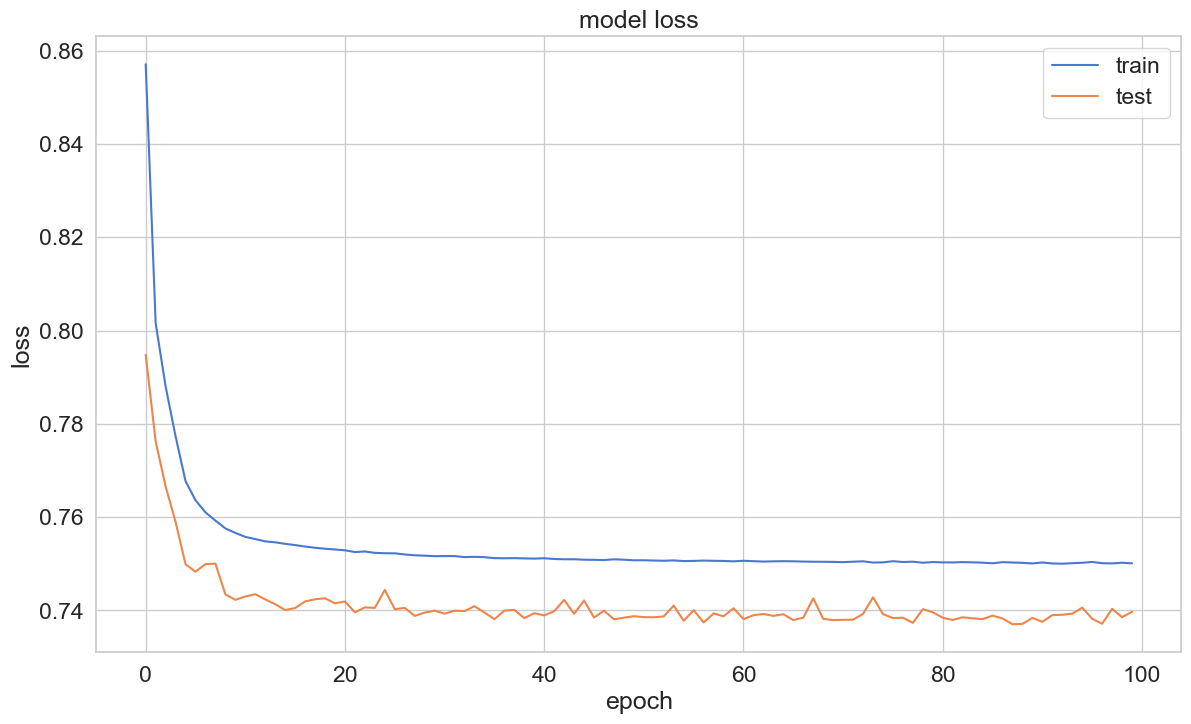

In [25]:
autoencoder = load_model('model.pt')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [26]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 2s 904us/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.761590,0.001720
std,3.463255,0.041443
min,0.069313,0.000000
25%,0.261690,0.000000
50%,0.408745,0.000000
75%,0.638141,0.000000
max,260.820177,1.000000


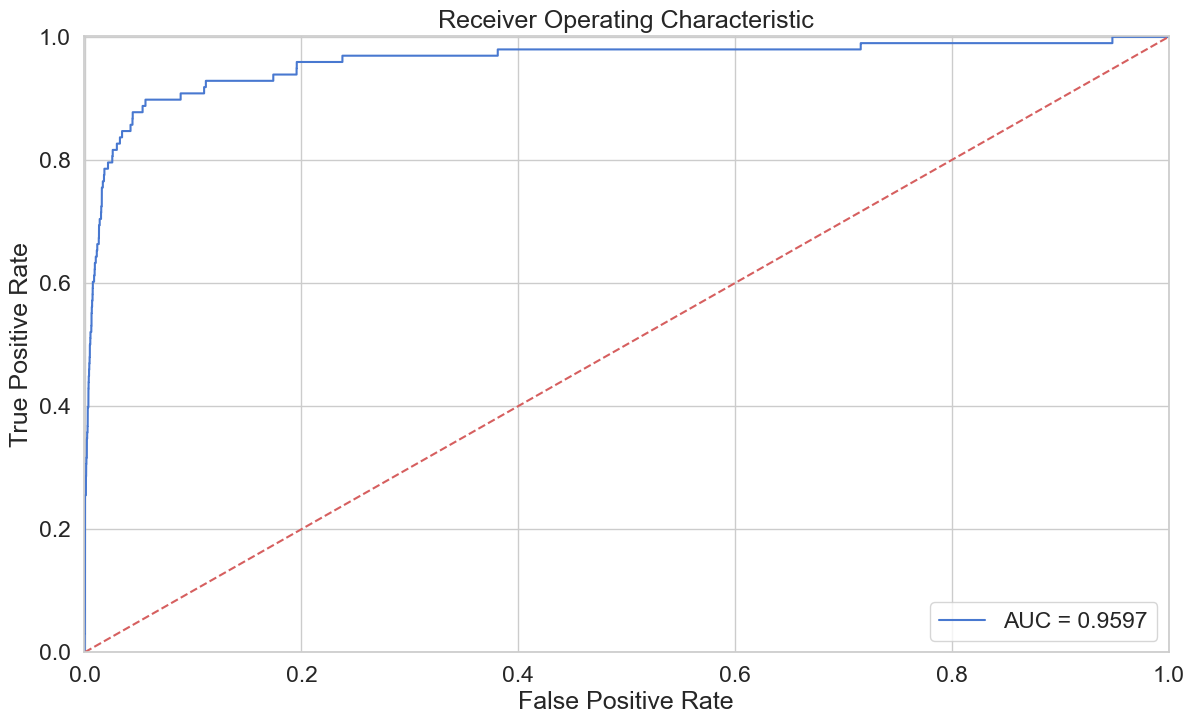

In [27]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

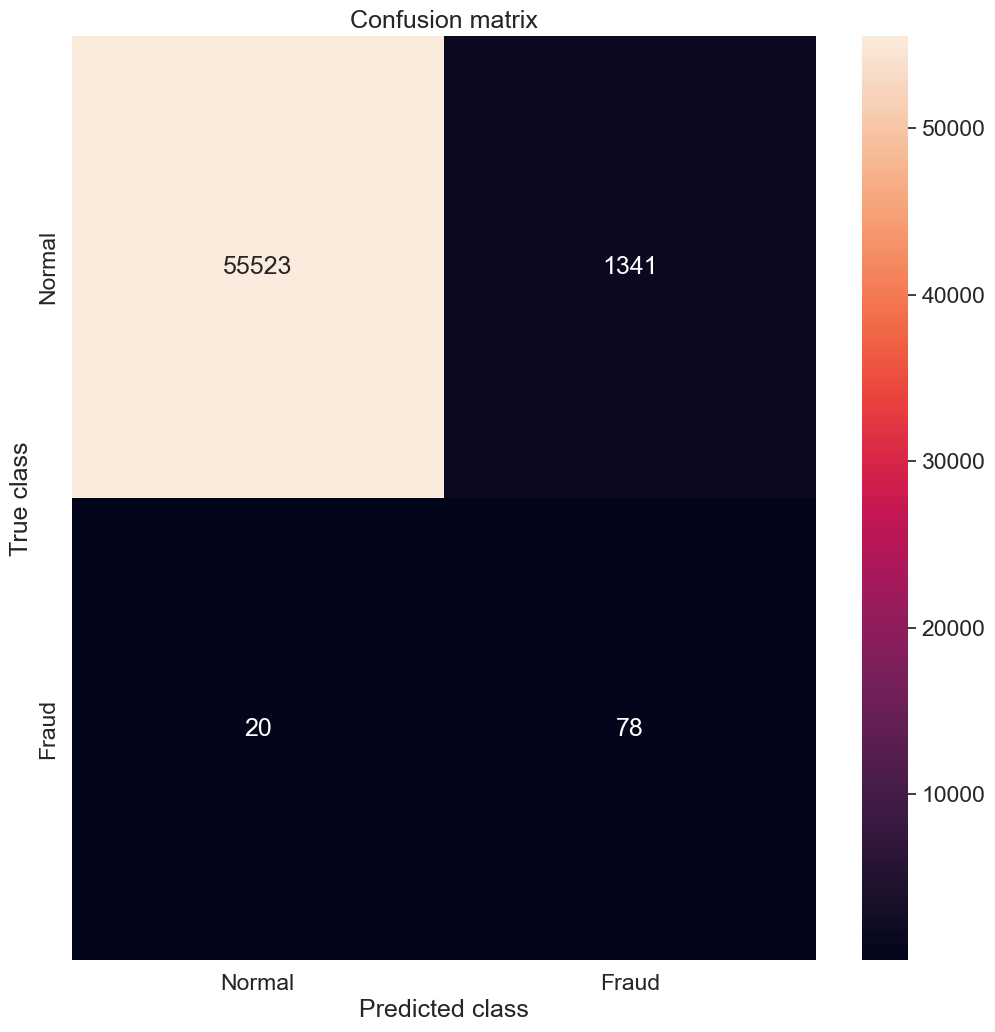

In [28]:
threshold = 2.9
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()